In [1]:
#Support Vector Machine
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris.data_module

'sklearn.datasets.data'

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
import pandas as pd
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
df[df.target == 0].head() #'setosa'

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df[df.target == 1].head() #'versicolor' 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [13]:
df[df.target == 2].head() #'virginica'

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [14]:
iris.target_names[0]

'setosa'

In [15]:
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x]) #flower name is dependent upon target value
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
#separate dataset
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

df0.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [19]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [20]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


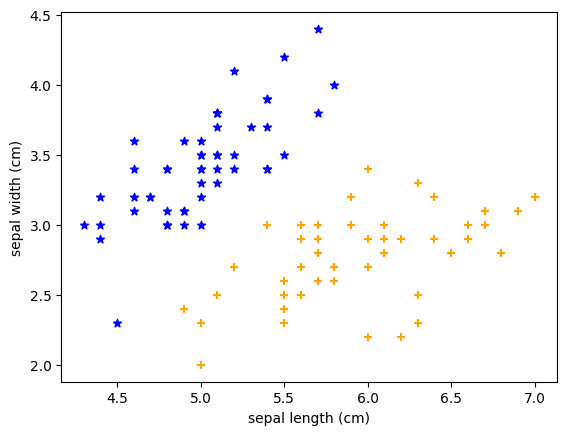

In [24]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color = 'blue', marker='*')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color = 'orange', marker = '+')

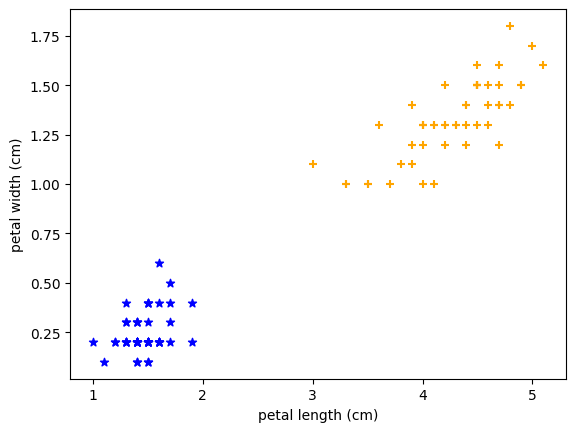

In [25]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color = 'blue', marker='*')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color = 'orange', marker = '+')

In [27]:
x = df.drop(['target', 'flower_names'], axis='columns')
y = df.target

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2)
len(x_train)

120

In [29]:
len(x_test)

30

In [33]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [34]:
model.fit(x_train, y_train)

SVC(kernel='linear')

In [35]:
model.score(x_test, y_test)

0.9666666666666667